In [39]:
import numpy as np
import sklearn as sk

In [51]:
#Mean:
scores = [55 , 92 , 78 , 60 , 85 , 78 , 90 , 66 , 73 , 88]

total_score = 0
number_of_values = len(scores)
for i in scores: 
    total_score += i

mean = total_score/number_of_values
print(mean)


76.5


In [62]:
#Median: 

sorted_values = sorted(scores)

length = len(sorted_values)
if length % 2 == 0:
    mid1 = sorted_values[length // 2 - 1]
    mid2 = sorted_values[length // 2]
    median_value = (mid1 + mid2) / 2
else:
    median_value = sorted_values[length // 2]
print("Median is:", median_value)


Median is: 78.0


In [72]:
#Mode

freq_dict = {}
for score in scores:
    if score in freq_dict:
        freq_dict[score] += 1
    else:
        freq_dict[score] = 1

max_freq = 0
for count in freq_dict.values():
    if count > max_freq:
        max_freq = count

modes = []
for score, count in freq_dict.items():
    if count == max_freq:
        modes.append(score)

print("Mode(s):", modes)

Mode(s): [np.int64(78)]


In [81]:
#Range

range_value = max(scores) - min(scores)
print("Range:", range_value)

Range: 37


In [89]:
#Variance and Standard deviation: 

import math

squared_differences = []
for score in scores:
    diff = score - mean
    squared = diff ** 2
    squared_differences.append(squared)

# Sum squared differences
sum_squared_differences = sum(squared_differences)

# Variance (Population)
variance = sum_squared_differences / len(scores)
print("Variance (Population):", variance)

# Standard Deviation (Population)
standard_deviation = math.sqrt(variance)
print("Standard Deviation (Population):", standard_deviation)

Variance (Population): 148.85
Standard Deviation (Population): 12.200409829181968


In [96]:
#Using numpy Mean, Median, Range (max-min), Population Variance, and Population Standard Deviation


scores = np.array([55, 92, 78, 60, 85, 78, 90, 66, 73, 88])

mean = np.mean(scores)
print("Mean:", mean)


median = np.median(scores)
print("Median:", median)


range = np.max(scores) - np.min(scores)
print("Range:", range   )


variance= np.var(scores, ddof=0)
print("Population Variance:", variance)


standard_deviation = np.std(scores, ddof=0)
print("Population Standard Deviation:", standard_deviation)

Mean: 76.5
Median: 78.0
Range: 37
Population Variance: 148.85
Population Standard Deviation: 12.200409829181968


In [102]:
#Used ChatGPT for understanding scipy and related functions...

from scipy import stats

scores = np.array([55, 92, 78, 60, 85, 78, 90, 66, 73, 88])

from scipy import stats
import numpy as np

scores = np.array([55, 92, 78, 60, 85, 78, 90, 66, 73, 88])

mode_result = stats.mode(scores, keepdims=False)  # keepdims=False returns scalar (Used ChatGPT for understanding error)
mode_value = mode_result.mode


print("Mode:", mode_value)


Mode: 78


I have compared all valaues and they are similar which validates the my manual usage of python to calculate the different statistical numericals. 

In [107]:
#finding for slope = 7 and c = 40

import numpy as np

X_experience = np.array([1, 2, 3, 4, 5, 6, 7, 8])
m = 7
c = 40

# Calculate predicted Y values using vectorized operation
Y_predicted = m * X_experience + c

print("Predicted Y values:", Y_predicted)


Predicted Y values: [47 54 61 68 75 82 89 96]


In [111]:
#Using Sklearn:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_experience = np . array ([1 , 2 , 3 , 4 , 5 , 6 , 7 , 8]) . reshape ( -1 , 1)
Y_salary = np . array ([45 , 50 , 60 , 65 , 75 , 80 , 90 , 95])

model = LinearRegression()
model.fit(X_experience,Y_salary)

m = model.coef_[0]
c = model.intercept_

x_new = np.array([1,2,3,4,5,6,7,8]).reshape(-1,1)
y_predicted = model.predict(x_new)

print("Predicted value:", y_predicted)

#Finding mean square error: 

mse = mean_squared_error(Y_salary,y_predicted)
r2 = r2_score(Y_salary,y_predicted)

print("Mean squared error:", mse)
print("R2 score:", r2)


Predicted value: [44.16666667 51.54761905 58.92857143 66.30952381 73.69047619 81.07142857
 88.45238095 95.83333333]
Mean squared error: 1.4880952380952395
R2 score: 0.994824016563147


Interpretations: 

1. The m and c values tell the slope and the y intercept of the relationship respectively.
2. The mean squared error tells how much the y predicted values differs from the y initial values, basically the salaries. It tells the average squared difference between y initial and y predicted. 
3. The r^2 tells how well your regression line explains the variance in the data. It ranges from 0 to 1 (or can be negative if the model is very bad).

In [114]:
#Logistic regression task

from sklearn.linear_model import LogisticRegression

X_prep_hours = np . array ([0.5 , 1.0 , 1.5 , 2.0 , 2.5 , 3.0 , 3.5 , 4.0 , 4.5 ,5.0]) . reshape ( -1 , 1)
Y_pass_fail = np . array ([0 , 0 , 0 , 0 , 1 , 0 , 1 , 1 , 1 , 1])

m = 2
c = -5

z = m * X_prep_hours + c  


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


probability_pass = sigmoid(z)


ypredicted = (probability_pass >= 0.5).astype(int)

#Learnt accuracy calculations from chatGPT
accuracy = np.sum(ypredicted.flatten() == Y_pass_fail) / len(Y_pass_fail)

#Learnt .flatten from ChatGPT

print("z values:", z.flatten())
print("Predicted probabilities:", probability_pass.flatten())
print("Predicted classes:", ypredicted.flatten())
print(f"Accuracy: {accuracy*100:.2f}%")


z values: [-4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]
Predicted probabilities: [0.01798621 0.04742587 0.11920292 0.26894142 0.5        0.73105858
 0.88079708 0.95257413 0.98201379 0.99330715]
Predicted classes: [0 0 0 0 1 1 1 1 1 1]
Accuracy: 90.00%


In [117]:
from sklearn.metrics import accuracy_score, confusion_matrix

model = LogisticRegression(solver='liblinear')
model.fit(X_prep_hours,Y_pass_fail)

m = model.coef_[0][0]
c = model.intercept_[0]

y_predict = model.predict(X_prep_hours)
print("Predicted classes on training data:", y_predict)

accuracy = accuracy_score(Y_pass_fail, y_predict)
conf_matrix = confusion_matrix(Y_pass_fail, y_predict)
print(f"Accuracy on training data: {accuracy*100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)



Predicted classes on training data: [0 0 0 1 1 1 1 1 1 1]
Accuracy on training data: 80.00%
Confusion Matrix:
[[3 2]
 [0 5]]


Accuracy score tells you how well the model correctly predicts pass or fail overall on the given data.

Confusion matrix parts:

True Positives (TP): Model correctly predicts students who pass.
True Negatives (TN): Model correctly predicts students who fail.
False Positives (FP): Model incorrectly predicts a student passes when they actually fail.
False Negatives (FN): Model incorrectly predicts a student fails when they actually pass.

Final centroids:
 [[5.5  3.75]
 [3.25 8.  ]]
Cluster labels for each point:
 [1 1 0 1 0 0 0 1]


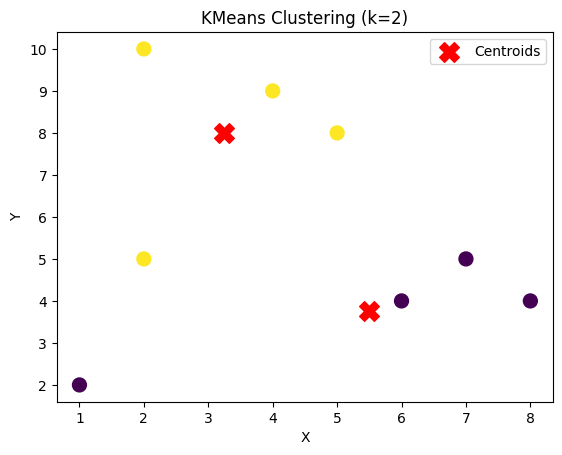

In [ ]:
#K means clustering

X_cluster_data = np . array ([[2 , 10] , [2 , 5] , [8 , 4] , [5 , 8] , [7 , 5] , [6 , 4] , [1 , 2] , [4 , 9]])

# Step 1: Initialisation: C1 = [2,10] and C2= [2,5]

# Step 2: Iteration 1 : After using d = whole root of (x2-x1)^2 + (y2-y1)^2. Using this then we find the closest centroids. for point 0 = c1, 1 = c2, 2 = c2, 3 = c1, 4 = c2, 5= c2, 6 = c2 and 7 = c1. 

# Step 3: Updating step where we average each point assigned to the cluster: for c1 = (2+5+4/3, 10+9+8/3) = (2.67,9.0) for c2 = (2+8+1+6+7/5,5+4+5+4+2/5) = (4.8,4.0)

# Step 4: Do steps again with new c1 and c2 values to verify. The centroids are: c1 = [3.67,9.0], c2 = [4.8,4.0]

#Using Sklearn: 

import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X_cluster_data = np.array([
    [2, 10], [2, 5], [8, 4], [5, 8], 
    [7, 5], [6, 4], [1, 2], [4, 9]
])

kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')
kmeans.fit(X_cluster_data)

print("Final centroids:\n", kmeans.cluster_centers_)
print("Cluster labels for each point:\n", kmeans.labels_)

#Visualisation through color-coded clusters (I learnt matplotlib :) )

plt.scatter(X_cluster_data[:, 0], X_cluster_data[:, 1], c=kmeans.labels_, cmap='viridis', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='red', marker='X', s=200, label='Centroids')
plt.title("KMeans Clustering (k=2)")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

